<a href="https://colab.research.google.com/github/Aneeshakaramath/LGMVIP-DataScience/blob/main/MUSIC_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LET'S GROW MORE -VIRTUAL INTERNSHIP 2022**
 September 2022
 BY ANEESHA PARVEEN S K


# MUSIC RECOMMENDATION SYSTEM

By using music recommender system, the music provider can predict and then offer the appropriate songs to their users based on the characteristics of the music that has been heard previously.



---

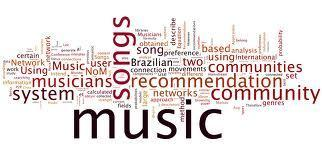

**AIM:**

To create a music recommendation system.



# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATASET

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DATASET/train.csv')
songs = pd.read_csv('/content/drive/MyDrive/DATASET/songs.csv',encoding='utf8')
members=pd.read_csv('/content/drive/MyDrive/DATASET/members.csv')

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
# check basic info of data
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674810 entries, 0 to 674809
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                674810 non-null  object 
 1   song_id             674810 non-null  object 
 2   source_system_tab   672896 non-null  object 
 3   source_screen_name  644109 non-null  object 
 4   source_type         673211 non-null  object 
 5   target              674809 non-null  float64
dtypes: float64(1), object(5)
memory usage: 30.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
<class 'pandas.core.frame.D

In [ ]:
train.describe()

,target
count,674809.000000
mean,0.714353
std,0.451722
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# get statistical summaries of dataset
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [ ]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [ ]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
674805,6A7/1UnMGrCC6d5HJ3hUpHElF1jDXJsbmh3+5H3Yqps=,bkLczKZJe0xSTGRhanYGSxxtkpGaYKC0uvF8y+Yy+Vw=,my library,Local playlist more,local-playlist,1.0
674806,6A7/1UnMGrCC6d5HJ3hUpHElF1jDXJsbmh3+5H3Yqps=,6hh4mqWakMwaCrB6qthuK4gS/YAIe+Vg/APmYhZSA2k=,my library,Local playlist more,local-playlist,1.0
674807,6A7/1UnMGrCC6d5HJ3hUpHElF1jDXJsbmh3+5H3Yqps=,qrpm0M42GYJyt5Erm7QnDWpNKUM3WvhszyInIozUBiA=,my library,Local playlist more,local-playlist,1.0
674808,6A7/1UnMGrCC6d5HJ3hUpHElF1jDXJsbmh3+5H3Yqps=,+64wu2E+e23X/DkdBrnwAJIqskxZp+MxCxxVm8n1l+Y=,my library,Local playlist more,local-playlist,1.0
674809,6A7/1UnMGrCC6d5HJ3hUpHElF1jDXJsbmh3+5H3Yqps=,HuyLf5Z+vrIJGpQbU8UunZkuqn9xCuG3YV4o+e2XM6A=,my library,Local pla,NaN,NaN


In [ ]:
train.shape

(674810, 6)

In [ ]:
songs.shape

(2296320, 7)

In [ ]:
members.shape

(34403, 7)

# DATA VISUALIZATION

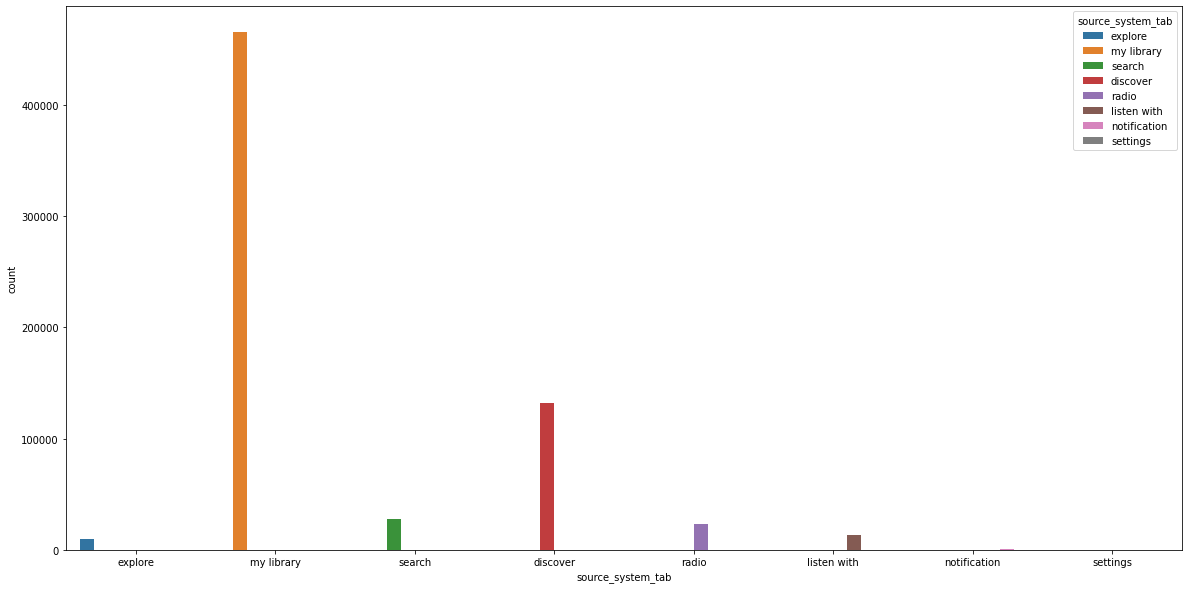

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

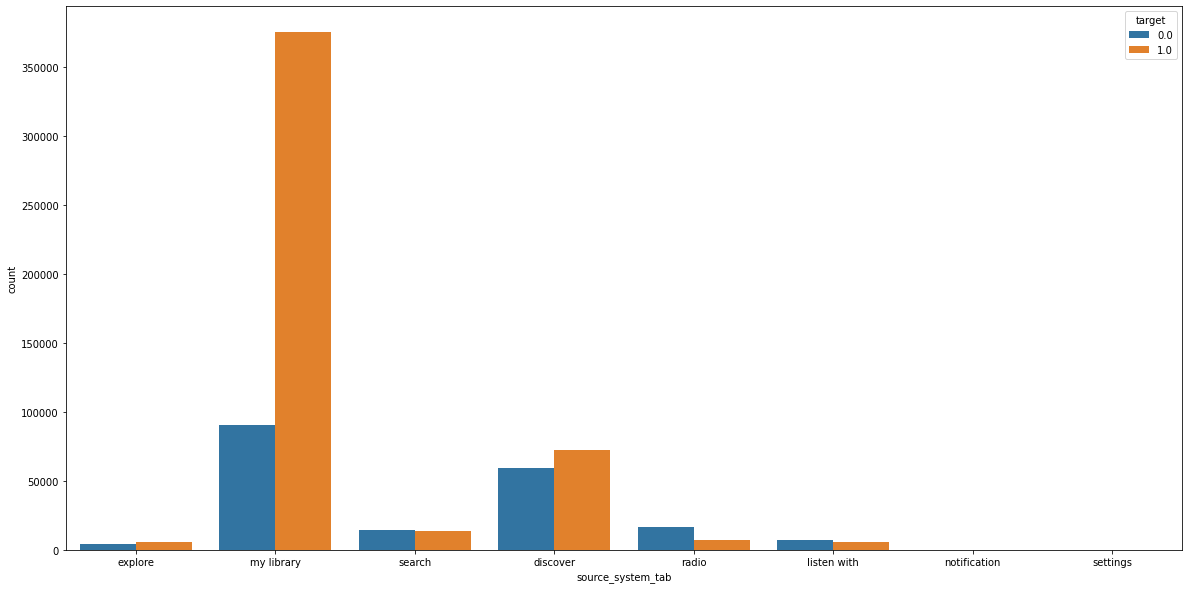

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

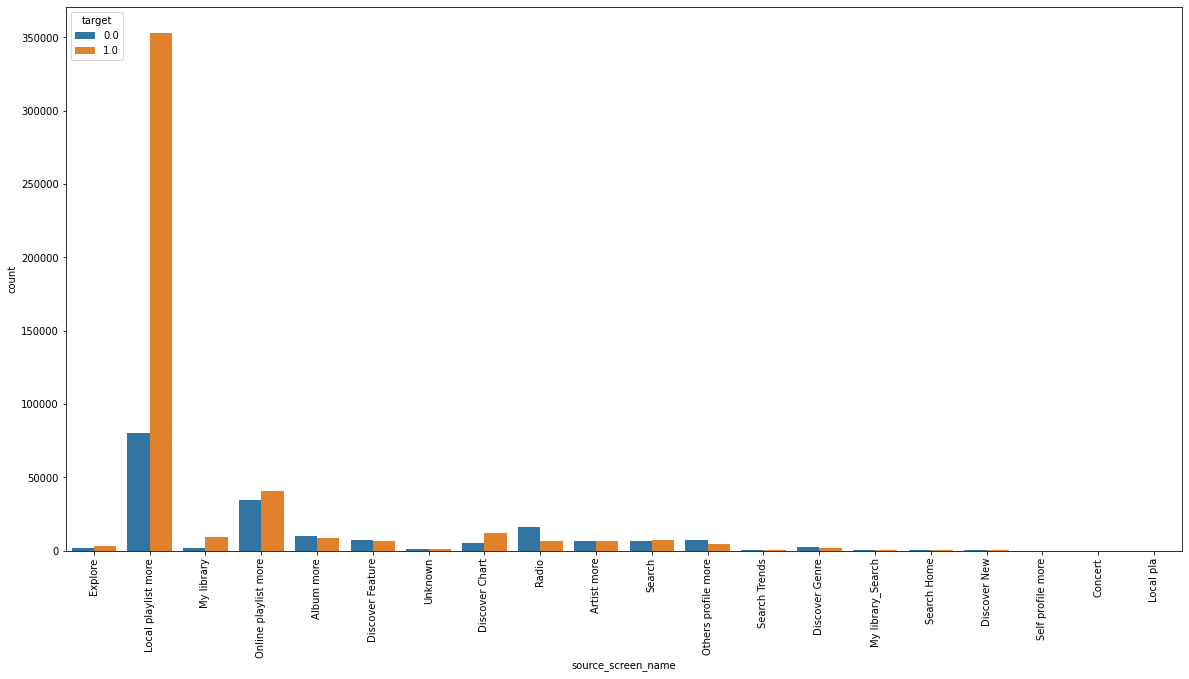

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)

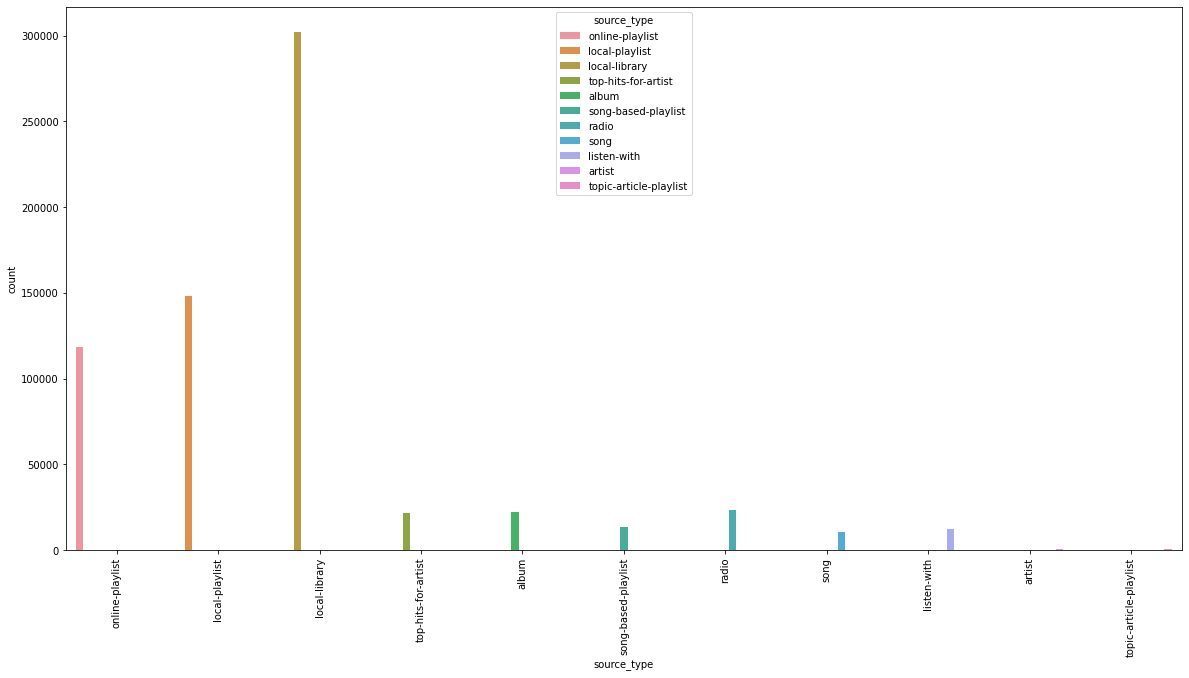

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)

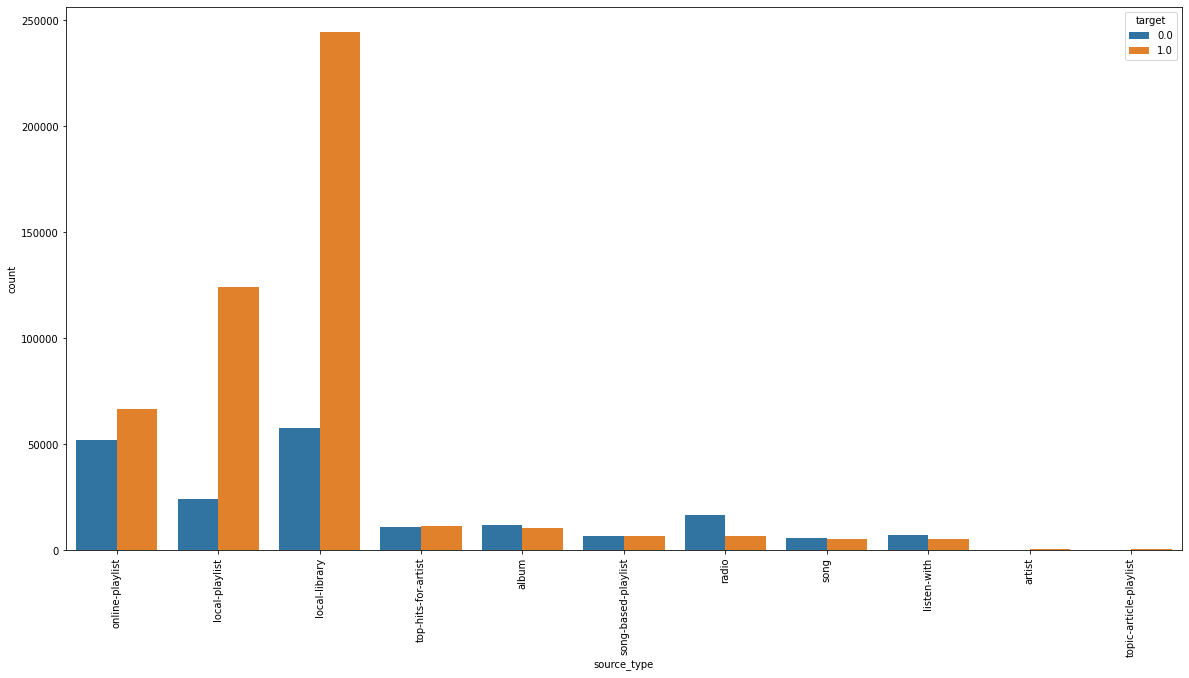

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)

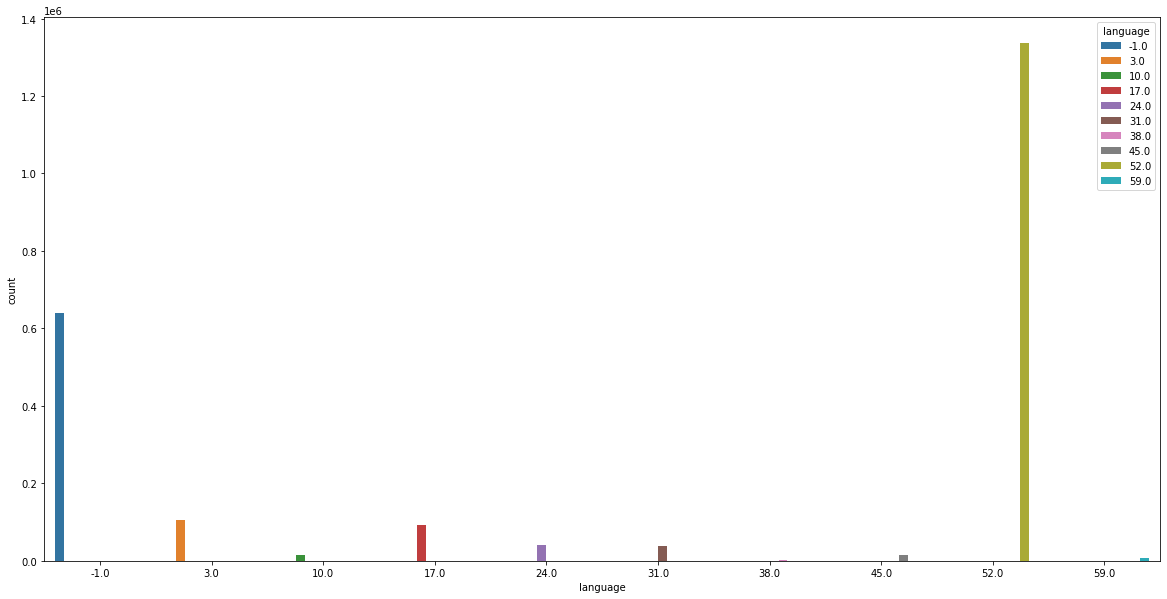

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', hue='language',data=songs)

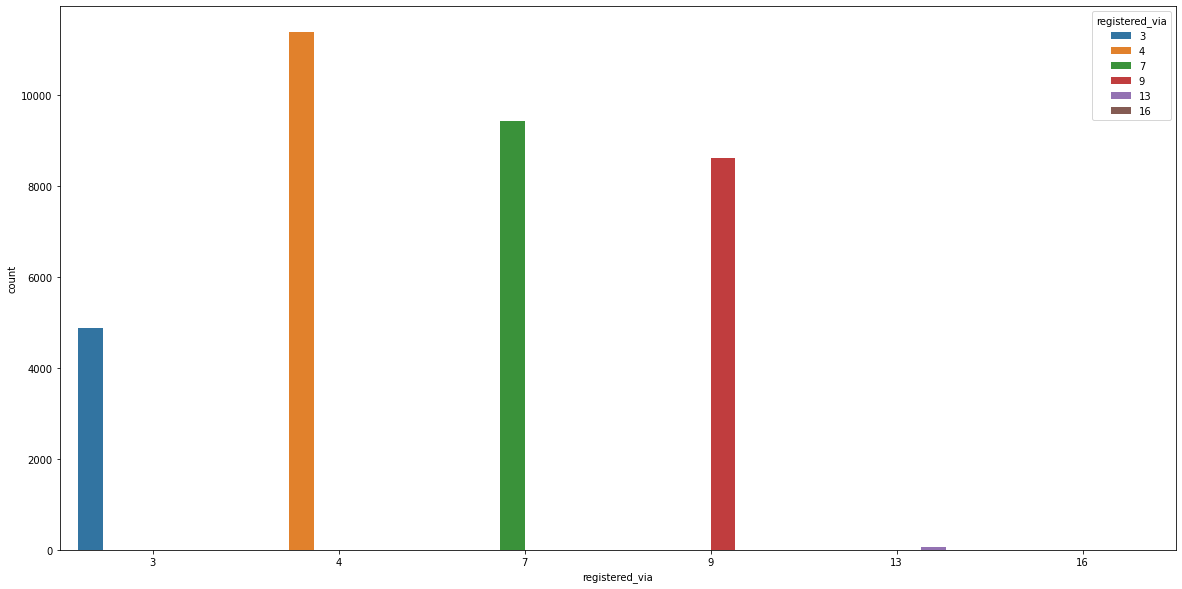

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via',data=members)

# DATA CLEANING

In [ ]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('/content/drive/MyDrive/DATASET/train.csv',names=names,skiprows=ntr,nrows=nts)

In [ ]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)

In [ ]:
import gc
del members, songs; gc.collect();

In [ ]:
cols = list(train.columns)
cols.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:03<00:00,  5.25it/s]


In [ ]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# BUILDING THE MODEL

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

# PREDICTION USING LOGISTIC REGRESSION

In [ ]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
predict(LogisticRegression())

Training Score : 0.7139474650477747
Accuracy on test data for the model 74.9


# PREDICTION USING LIGHTGBM

In [ ]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.820248	valid_1's auc: 0.807488
[20]	training's auc: 0.851918	valid_1's auc: 0.835112
[30]	training's auc: 0.866686	valid_1's auc: 0.845539
[40]	training's auc: 0.879231	valid_1's auc: 0.853755
[50]	training's auc: 0.887547	valid_1's auc: 0.856673
[60]	training's auc: 0.89534	valid_1's auc: 0.860268
[70]	training's auc: 0.902167	valid_1's auc: 0.863513
[80]	training's auc: 0.908078	valid_1's auc: 0.865657
[90]	training's auc: 0.91291	valid_1's auc: 0.86659
[100]	training's auc: 0.917719	valid_1's auc: 0.867053
[110]	training's auc: 0.922767	valid_1's auc: 0.869064
Early stopping, best iteration is:
[109]	training's auc: 0.922352	valid_1's auc: 0.869137


In [ ]:
p_test = model1.predict(X_test)

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 87.500000%


**CONCLUSION:**

The accuracy of logistic regression model is 74.9%

The accuracy of lgbm model is 87.50%

Hence, we conclude that lgbm model is better than logistic regression model
